In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
import os

<IPython.core.display.Javascript object>


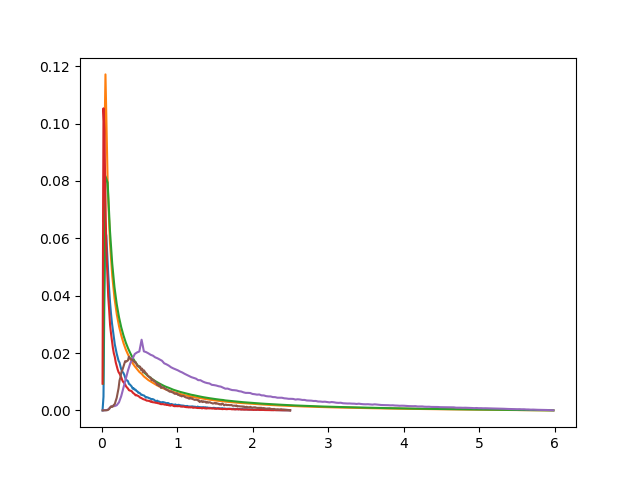

In [9]:
files = glob.glob('*.txt')

plt.figure()

for file in files:
    
    fluence = []
    energies = []

    with open(file) as f:

        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    fluence /= np.sum(fluence)
    
    plt.plot(energies,fluence,label=file.split('.')[0])

    fluence_str = [str(fluenc) for fluenc in fluence]
    energies = [str(energy) for energy in energies]
    with open(file.split('.txt')[0] + 'topas','w') as out:
        out.write(file + '\n \n')
        out.write('dv:So/Example/BeamEnergySpectrumValues = ' + str(len(energies)) +' ' + ' '.join(energies) + '\n')
        out.write('uv:So/Example/BeamEnergySpectrumWeights = ' + str(len(energies)) + ' ' + ' '.join(fluence_str) + '\n \n')

In [10]:
files

['Al_spectrum_25.txt',
 'C_spectrum_6.txt',
 'Al_spectrum_6.txt',
 'C_spectrum_25.txt',
 'W_spectrum_6.txt',
 'W_spectrum_25.txt']

In [6]:
plt.xlim([None,3])
plt.xlabel('MeV')
plt.ylabel('Normalized Fluence (a.u.)')
plt.legend()

In [7]:
plt.savefig('spectra.png')

In [7]:
doses = np.array([
1.613708349168519e-07,
1.313530049174005e-07,
6.200432949299284e-07,
3.304057543118688e-07,
2.999242099122057e-07,
3.515523019359534e-07,

])
names = np.array([
'Dose_Al_spectrum_25'  ,
'Dose_C_spectrum_25'  ,
'Dose_W_spectrum_6',
'Dose_Al_spectrum_6'  , 
'Dose_C_spectrum_6',
'Dose_W_spectrum_25'])

<IPython.core.display.Javascript object>


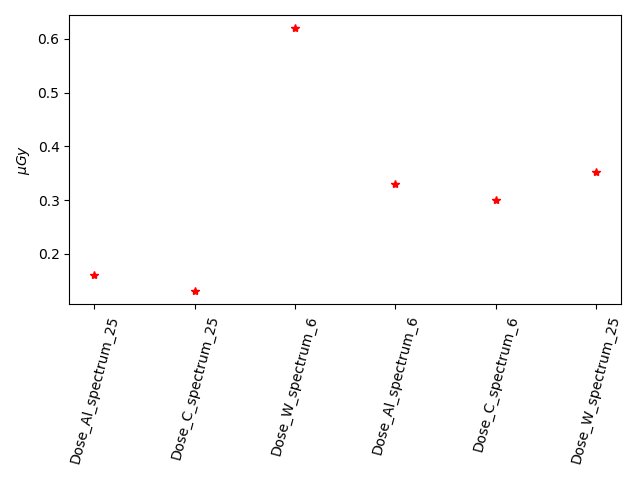

In [8]:
import pandas as pd

dat = pd.DataFrame(np.array(doses)*1e6,index=names)

plt.figure()
plt.plot(dat,'r*')
plt.xticks(rotation=75)
plt.ylabel('$\mu Gy$')
plt.tight_layout()

In [12]:
plt.savefig('doses.png')